___
# Ciência dos Dados - PROJETO 1

### Vitor Satyro Vitturi - Turma 2A
___

## Qual a proporção do uso de internet via celular e microcomputador em relação às classes socio-econômicas, nos estados de São Paulo e Bahia entre 2013 a 2015?

___
## Introdução
A partir da analise é possivel observar como a população dos estados do Nordeste(Bahia) e de São Paulo(São Paulo), utilizam a internet, via celular ou via microcomputador. Comparando entre classes socio-economicas ao longo de 3 anos(2013-2015).

### Professor Fabio Miranda


___
## Análise e Resultados

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

In [2]:
print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
C:\Users\vitor\Dropbox\Insper\2017.2\Ciencia de Dados\Projeto1\CienciaDados


In [45]:
#Configurar as colunas que usarei

dados_2015 = pd.read_csv('DOM2015.csv',sep=',')

dados_2015 = pd.DataFrame(dados_2015)

dados15 = dados_2015.loc[:,['UF','V4621','V02322','V02323','V02324','V02424',]]

dados_2014 = pd.read_csv('DOM2014.csv',sep=',')

dados_2014 = pd.DataFrame(dados_2014)

dados14 = dados_2014.loc[:,['UF','V4621','V02322','V02323','V02324','V02424',]]

dados_2013 = pd.read_csv('DOM2013.csv',sep=',')

dados_2013 = pd.DataFrame(dados_2013)

dados13 = dados_2013.loc[:,['UF','V4621','V02322','V02323','V02324','V02424',]]

# Restringindo colunas 

In [46]:
#Tirar NaN
dados15 = dados15.loc[(dados15.V4621 >= 0) & (dados15.V4621 != 999999999999)]
dados15 = dados15.loc[(dados15.UF == 35) | (dados15.UF == 29)]
dados15 = dados15[pd.notnull(dados15.V4621) &\
                  pd.notnull(dados15.V02322) &\
                  pd.notnull(dados15.V02323) &\
                  pd.notnull(dados15.V02324) &\
                  pd.notnull(dados15.V02424)]

dados14 = dados14.loc[(dados14.V4621 >= 0) & (dados14.V4621 != 999999999999)]
dados14 = dados14.loc[(dados14.UF == 35) | (dados14.UF == 29)]
dados14 = dados14[pd.notnull(dados14.V4621) &\
                  pd.notnull(dados14.V02322) &\
                  pd.notnull(dados14.V02323) &\
                  pd.notnull(dados14.V02324) &\
                  pd.notnull(dados14.V02424)]

dados13 = dados13.loc[(dados13.V4621 >= 0) & (dados13.V4621 != 999999999999)]
dados13 = dados13.loc[(dados13.UF == 35) | (dados13.UF == 29)]
dados13 = dados13[pd.notnull(dados13.V4621) &\
                  pd.notnull(dados13.V02322) &\
                  pd.notnull(dados13.V02323) &\
                  pd.notnull(dados13.V02324) &\
                  pd.notnull(dados13.V02424)]


In [47]:
dados15.head(3)

,UF,V4621,V02322,V02323,V02324,V02424
53018,29,819.0,2.0,2.0,2.0,2.0
53022,29,2375.0,2.0,2.0,2.0,2.0
53023,29,396.0,2.0,2.0,2.0,2.0


In [48]:
dados15.UF = dados15.UF.astype('category')
dados15.V4621 = dados15.V4621.astype('int')
dados15.V02322 = dados15.V02322.astype('category')
dados15.V02323 = dados15.V02323.astype('category')
dados15.V02324 = dados15.V02324.astype('category')
dados15.V02424 = dados15.V02424.astype('category')

dados14.UF = dados14.UF.astype('category')
dados14.V4621 = dados14.V4621.astype('int')
dados14.V02322 = dados14.V02322.astype('category')
dados14.V02323 = dados14.V02323.astype('category')
dados14.V02324 = dados14.V02324.astype('category')
dados14.V02424 = dados14.V02424.astype('category')

dados13.UF = dados13.UF.astype('category')
dados13.V4621 = dados13.V4621.astype('int')
dados13.V02322 = dados13.V02322.astype('category')
dados13.V02323 = dados13.V02323.astype('category')
dados13.V02324 = dados13.V02324.astype('category')
dados13.V02424 = dados13.V02424.astype('category')

In [96]:
dados15.UF.cat.categories

Index(['Bahia', 'São Paulo'], dtype='object')

In [50]:
dados15.UF.cat.categories = {'Bahia','São Paulo'}
dados15.V02322.cat.categories = {'Sim'}
dados15.V02323.cat.categories = {'Sim','Não'}
dados15.V02324.cat.categories = {'Sim','Não'}
dados15.V02424.cat.categories = {'Sim','Não'}


dados14.UF.cat.categories = {'Bahia','São Paulo'}
dados14.V02322.cat.categories = {'Sim'}
dados14.V02323.cat.categories = {'Sim','Não'}
dados14.V02324.cat.categories = {'Sim','Não'}
dados14.V02424.cat.categories = {'Sim','Não'}


dados13.UF.cat.categories = {'Bahia','São Paulo'}
dados13.V02322.cat.categories = {'Sim'}
dados13.V02323.cat.categories = {'Sim','Não'}
dados13.V02324.cat.categories = {'Sim','Não'}
dados13.V02424.cat.categories = {'Sim','Não'}



In [51]:
dados15 = dados15.rename(columns = {"V4621":"Renda Salarial(R$)","V02322":"Acesso a internet em Domicílio", "V02323":"Acesso a internet em Microcomputador", "V02324":"Acesso a internet em Celular","V02424":"Acesso a internet em 3G 4G"})
renda_15 = dados15["Renda Salarial(R$)"]

dados14 = dados14.rename(columns = {"V4621":"Renda Salarial(R$)","V02322":"Acesso a internet em Domicílio", "V02323":"Acesso a internet em Microcomputador", "V02324":"Acesso a internet em Celular","V02424":"Acesso a internet em 3G 4G"})
renda_14 = dados14["Renda Salarial(R$)"]

dados13 = dados13.rename(columns = {"V4621":"Renda Salarial(R$)","V02322":"Acesso a internet em Domicílio", "V02323":"Acesso a internet em Microcomputador", "V02324":"Acesso a internet em Celular","V02424":"Acesso a internet em 3G 4G"})
renda_13 = dados13["Renda Salarial(R$)"]

In [52]:
#Variaveis escolhidas de acordo com o salário minimo (aprox 800 reias) e observa-se uma distribuição do tipo normal no gráfico

alta = 3000
media = 1500
baixa = 500

dados15.loc[dados15["Renda Salarial(R$)"] <= baixa, "Classe"] = "baixa"
dados15.loc[(dados15["Renda Salarial(R$)"] > baixa) & (dados15["Renda Salarial(R$)"] <= media), "Classe"] = "média_baixa"
dados15.loc[(dados15["Renda Salarial(R$)"] > media) & (dados15["Renda Salarial(R$)"] <= alta), "Classe"] = "média"
dados15.loc[dados15["Renda Salarial(R$)"] > alta, "Classe"] = "alta"
dados15["Classe"] = dados15["Classe"].astype('category')

dados13.loc[dados13["Renda Salarial(R$)"] <= baixa, "Classe"] = "baixa"
dados13.loc[(dados13["Renda Salarial(R$)"] > baixa) & (dados13["Renda Salarial(R$)"] <= media), "Classe"] = "média_baixa"
dados13.loc[(dados13["Renda Salarial(R$)"] > media) & (dados13["Renda Salarial(R$)"] <= alta), "Classe"] = "média"
dados13.loc[dados13["Renda Salarial(R$)"] > alta, "Classe"] = "alta"
dados13["Classe"] = dados13["Classe"].astype('category')

dados14.loc[dados14["Renda Salarial(R$)"] <= baixa, "Classe"] = "baixa"
dados14.loc[(dados14["Renda Salarial(R$)"] > baixa) & (dados14["Renda Salarial(R$)"] <= media), "Classe"] = "média_baixa"
dados14.loc[(dados14["Renda Salarial(R$)"] > media) & (dados14["Renda Salarial(R$)"] <= alta), "Classe"] = "média"
dados14.loc[dados14["Renda Salarial(R$)"] > alta, "Classe"] = "alta"
dados14["Classe"] = dados14["Classe"].astype('category')

# Gráficos para análise

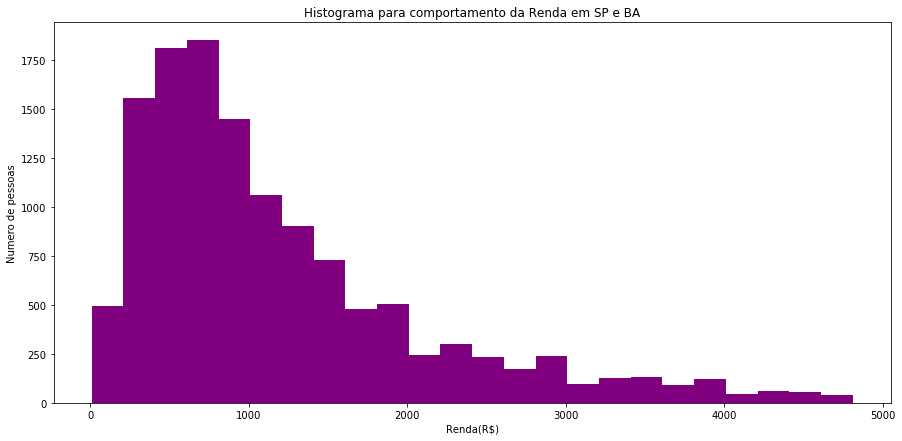

In [94]:
#Prova de uma distribuição do tipo normal na renda devido ao salario minimo

ganham_menos = renda_15[renda_15 < 50000]
ganham_menos.plot(kind='hist',bins = range(10,5000,200),  figsize=(15,7), color=("Purple"))
plt.title('Histograma para comportamento da Renda em SP e BA')
plt.xlabel('Renda(R$)')
plt.ylabel("Numero de pessoas")

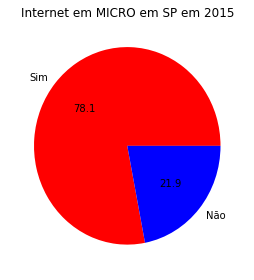

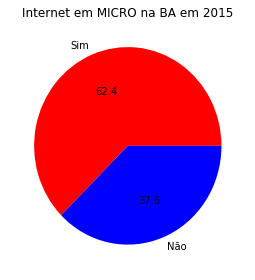

Bahia
Sim    286400
Não    172500
Name: Acesso a internet em Microcomputador, dtype: int64

São Paulo
Sim    712600
Não    200400
Name: Acesso a internet em Microcomputador, dtype: int64


In [93]:
df15_SP = dados15[dados15.UF == 'São Paulo']
df15_BA = dados15[dados15.UF == 'Bahia']

fig = plt.figure(figsize=(11,4))
plt.subplot(131)

microSP = df15_SP["Acesso a internet em Microcomputador"].value_counts(sort=False)*100
microSP.plot(kind='pie', autopct="%.1f", colors=('red','blue'), title='Internet em MICRO em SP em 2015')
plt.ylabel('')
plt.tight_layout()
plt.show()

fig = plt.figure(figsize=(11,4))
plt.subplot(133)
microBA = df15_BA["Acesso a internet em Microcomputador"].value_counts(sort=False)*100
microBA.plot(kind='pie', autopct="%.1f", colors=('red','blue'), title='Internet em MICRO na BA em 2015')
plt.ylabel('')
plt.tight_layout()
plt.show()

print('Bahia')
print(microBA)

print('\nSão Paulo')
print(microSP)

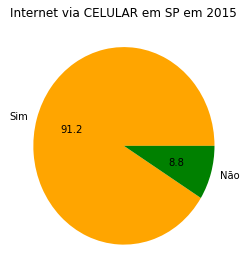

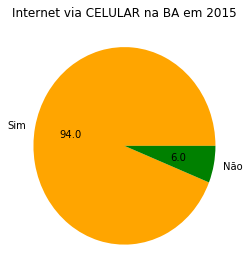

Bahia
Sim    431200
Não     27700
Name: Acesso a internet em Celular, dtype: int64

São Paulo
Sim    832200
Não     80800
Name: Acesso a internet em Celular, dtype: int64


In [95]:
df15_SP = dados15[dados15.UF == 'São Paulo']
df15_BA = dados15[dados15.UF == 'Bahia']

fig = plt.figure(figsize=(11,4))
plt.subplot(131)
celSP = df15_SP["Acesso a internet em Celular"].value_counts(sort=False)*100
celSP.plot(kind='pie', autopct="%.1f", colors=('orange','green'), title='Internet via CELULAR em SP em 2015')
plt.ylabel('')
plt.tight_layout()
plt.show()

fig = plt.figure(figsize=(11,4))
plt.subplot(133)
celBA = df15_BA["Acesso a internet em Celular"].value_counts(sort=False)*100
celBA.plot(kind='pie', autopct="%.1f", colors=('orange','green'), title='Internet via CELULAR na BA em 2015')
plt.ylabel('')
plt.tight_layout()
plt.show()

print('Bahia')
print(celBA)

print('\nSão Paulo')
print(celSP)

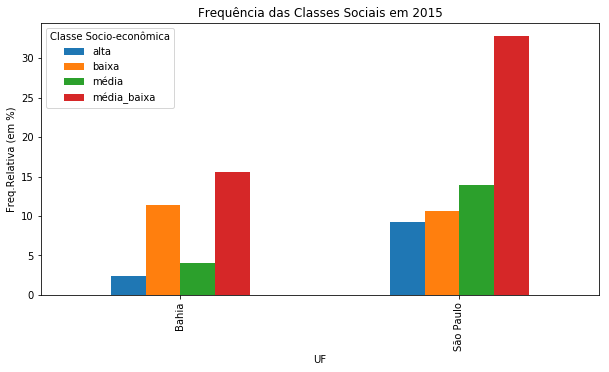

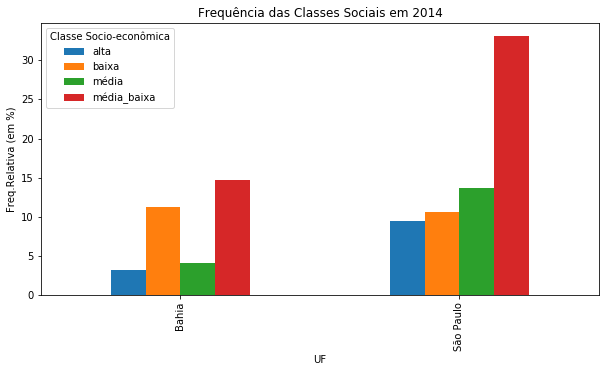

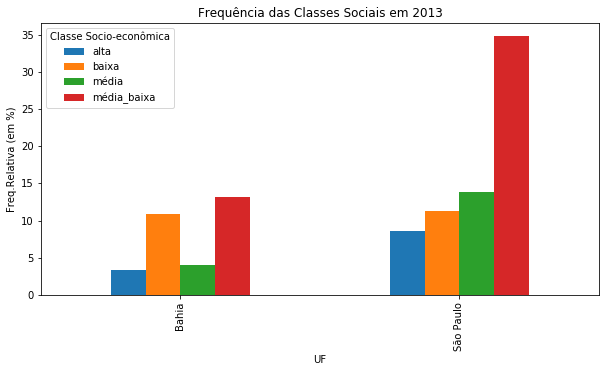

In [126]:
#Freq Relativa 
celSPBA15 = pd.crosstab(dados15.UF, dados15["Classe"], margins=True, rownames=['UF'], colnames=['Classe Socio-econômica'], normalize=True)*100
celSPBA15 = celSPBA15.round(decimals = 1)
plot = celSPBA15.iloc[0:2, :4].plot(kind='bar', title='Frequência das Classes Sociais em 2015', figsize=(10,5))
plt.ylabel("Freq.Relativa (em %)")

celSPBA14 = pd.crosstab(dados14.UF, dados14["Classe"], margins=True, rownames=['UF'], colnames=['Classe Socio-econômica'], normalize=True)*100
celSPBA14 = celSPBA14.round(decimals = 1)
plot = celSPBA14.iloc[0:2, :4].plot(kind='bar', title='Frequência das Classes Sociais em 2014', figsize=(10,5))
plt.ylabel("Freq.Relativa (em %)")

celSPBA13 = pd.crosstab(dados13.UF, dados13["Classe"], margins=True, rownames=['UF'], colnames=['Classe Socio-econômica'], normalize=True)*100
celSPBA13 = celSPBA13.round(decimals = 1)
plot = celSPBA13.iloc[0:2, :4].plot(kind='bar', title='Frequência das Classes Sociais em 2013', figsize=(10,5))
plt.ylabel("Freq.Relativa (em %)")


###  Classe Média em São Paulo é superior à classe Baixa em todos os anos
### Classe Baixa na Bahia é quase o dobro da classe Média em todos os anos

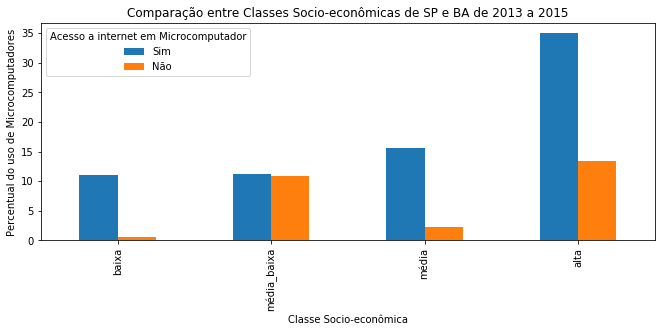

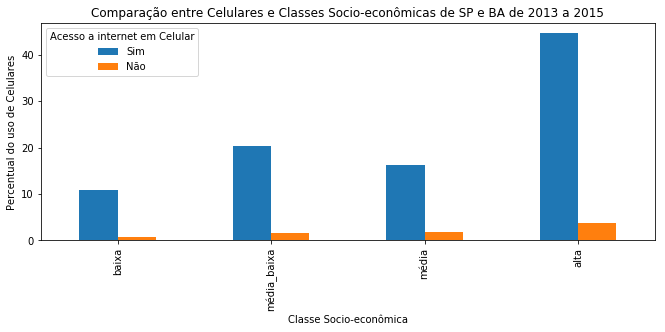

In [131]:
#Renda menor que 30000 dividida em 4 partes comparada com uso de internet via microcomputador
cross_Class_Mic = pd.crosstab(dados15["Classe"], dados15["Acesso a internet em Microcomputador"], normalize=True)*100
cross_Class_Mic.plot(kind='bar', figsize=(11,4))
plt.xticks(np.arange(4),('baixa','média_baixa','média','alta'))
plt.ylabel("Percentual do uso de Microcomputadores")
plt.xlabel("Classe Socio-econômica")
plt.title("Comparação entre Classes Socio-econômicas de SP e BA de 2013 a 2015")

cross_Class_Cel = pd.crosstab(dados15["Classe"], dados15["Acesso a internet em Celular"], normalize=True)*100
cross_Class_Cel.plot(kind='bar', figsize=(11,4))
plt.xticks(np.arange(4),('baixa','média_baixa','média','alta'))
plt.ylabel("Percentual do uso de Celulares")
plt.xlabel("Classe Socio-econômica")
plt.title("Comparação entre Celulares e Classes Socio-econômicas de SP e BA de 2013 a 2015")

___
## Conclusão 

Descreva aqui suas conclusões!